## This notebook will work through the calculations for the various individual solar panel parameters, as well as produce some graphics. This will eventually be broken up into individual functions and python files.

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#First step is to write the code that pulls in the data. We'll work with pre-formatted data. 
panel_data = pd.read_excel(io = 'spirit_of_alaska_fairbanks_cleaned.xlsx')
panel_data.head()

,Year,Month,Johansen Solar (kWh),Gillam Solar (kWh)
0,2011,May,93.412,NaN
1,2011,June,516.681,NaN
2,2011,July,535.737,NaN
3,2011,August,447.844,NaN
4,2011,September,328.926,NaN


In [39]:
#Ok, data added, we need to find a way to flip into having a month/time type format. 
#data_length = np.zeros(len(panel_data.index))
panel_data['Month_Year'] = 0
for i in range (len(panel_data.index)):
    panel_data['Month_Year'][i] = str(panel_data['Month'][i]) + ', ' + str(panel_data['Year'][i])
panel_data



C:\Users\Jonorato\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Month,Johansen Solar (kWh),Gillam Solar (kWh),Month_Year
0,2011,May,93.412,NaN,"May, 2011"
1,2011,June,516.681,NaN,"June, 2011"
2,2011,July,535.737,NaN,"July, 2011"
3,2011,August,447.844,NaN,"August, 2011"
4,2011,September,328.926,NaN,"September, 2011"
5,2011,October,191.656,NaN,"October, 2011"
6,2011,November,17.477,NaN,"November, 2011"
7,2011,December,2.347,NaN,"December, 2011"
8,2012,January,12.721,NaN,"January, 2012"
9,2012,February,123.837,NaN,"February, 2012"


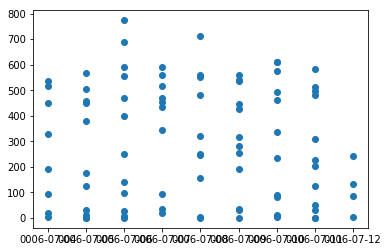

In [41]:
plt.plot_date(x = panel_data['Year'], y = panel_data['Johansen Solar (kWh)'], xdate = True)

[2011 2012 2013 2014 2015 2016 2017 2018 2019]


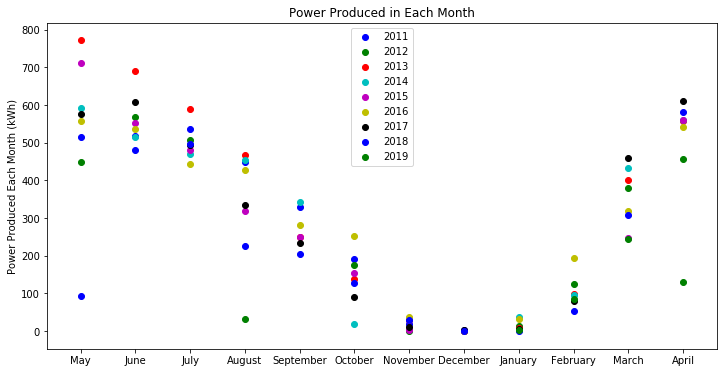

In [101]:
#Ok, so the above graph isn't really ideal. We'll need to find another way to represent the data that makes it look right.
year_range = panel_data.Year.unique()
print(year_range)
label_count = 0
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm']
fig, ax = plt.subplots(figsize = (12,6))
for i in range(len(year_range)):
    month_list = []
    power_list = []
    for j in range(len(panel_data.index)):
        if panel_data['Year'][j] == year_range[i]:
            month_list.append(panel_data['Month'][j])
            power_list.append(panel_data['Johansen Solar (kWh)'][j])
        if len(month_list) >= 12:
            break
    ax.scatter(x = month_list, y = power_list, label = year_range[i], c = colors[i])
        
        
#         if panel_data['Year'][j] == year_range[i] and label_count == 0:
#             ax.scatter(x = panel_data['Month'][j], y = panel_data['Johansen Solar (kWh)'][j], label = year_range[i], c = colors[i])
#             label_count += 1
#             print("Unique label detected")
            
#         elif panel_data['Year'][j] == year_range[i]:
#             ax.scatter(x = panel_data['Month'][j], y = panel_data['Johansen Solar (kWh)'][j])
#     label_count = 0
ax.legend()
ax.set_ylabel("Power Produced Each Month (kWh)")
ax.set_title("Power Produced in Each Month")
plt.show()



In [84]:
def plot_month_year(solar_dataframe):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-84-bbd3ab5123f8>, line 2)

### Generate the kwh produced per day (or month) graph

Text(0.5, 1.0, 'Monthly Power Production of Individual Panel')

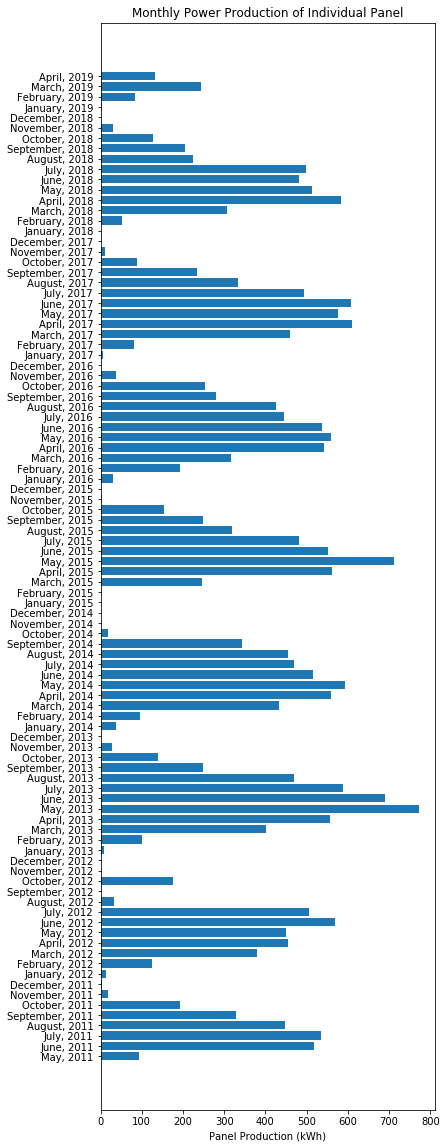

In [52]:
#barh

fig, ax = plt.subplots(figsize = (6,20))
ax.barh(panel_data['Month_Year'], panel_data['Johansen Solar (kWh)'])
ax.set_xlabel("Panel Production (kWh)", size = 10)
ax.set_title("Monthly Power Production of Individual Panel")

In [53]:
def plot_kwh_produced_monthly():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-53-411195880a94>, line 2)

### Next goal is to generate the Normalized Annual Production, which is a rolling average (each month should show the average of all power produced over the past 12 months) of power production over the past 12 months.

In [146]:
#Using the Johansen Solar at First, which has a DC generation of 2.8 kW.
plottable_range = len(panel_data.index) - 12
rolling_average = []
for i in range(plottable_range):
    #Divide everything by 2.8, the kW rating of the solar panels installed. 
    this_average = np.mean(panel_data['Johansen Solar (kWh)'][i:i+12])/2.8
    rolling_average.append(this_average)

[ 0  8 16 24 33 41 49 58 66 74 83]


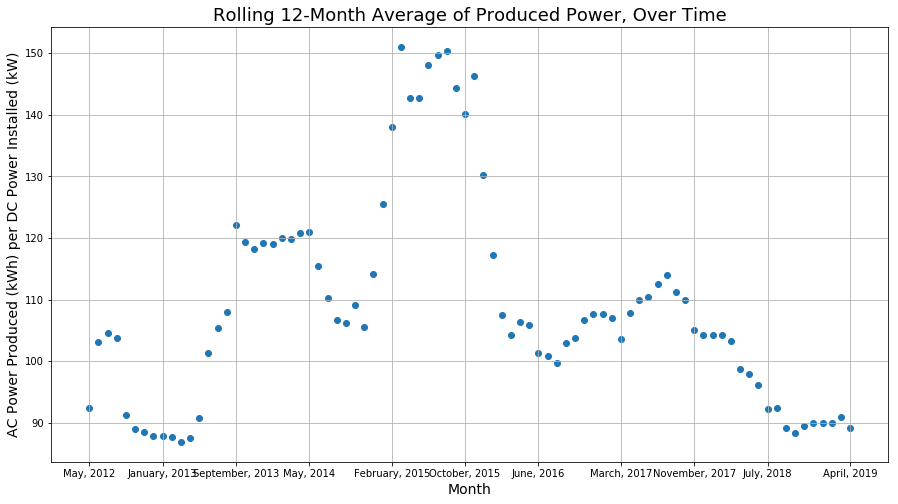

In [151]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.scatter(x = panel_data['Month_Year'][12:len(panel_data.index)], y = rolling_average)
tick_spacing = np.linspace(0, len(panel_data.index)-13, 11, dtype = 'int')
ax.set_xticks(tick_spacing)
ax.set_title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
ax.grid()

### Last one is the cumulative energy produced over the year, per year. 